<a href="https://colab.research.google.com/github/VishakhAgarwal/Cool3/blob/main/Copy_of_Untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import random
import time

# Define the constants and ranges
time_stamps = 5000
time_interval = 30
regions_of_influence = ['A', 'B', 'C', 'D']
humidity_mean = 50
power_mean = 12.50
outside_temp_mean = 25
outside_humidity_mean = 50
outlet_temp_mean = 26

inlet_temp_range = (15, 18)
outlet_temp_range = (19, 33)
humidity_range = (40, 60)
power_range = (5, 20)
outside_temp_range = (15, 35)
outside_humidity_range = (20, 80)

data = []
prev_outside_temp = random.uniform(*outside_temp_range)
prev_outside_humidity = random.uniform(*outside_humidity_range)

timestamp = int(time.time())  # Get the current timestamp in seconds

for ts in range(time_stamps):
    timestamp += time_interval

    outside_temp = random.uniform(prev_outside_temp - 0.2, prev_outside_temp + 0.2)
    outside_humidity = random.uniform(prev_outside_humidity - 1, prev_outside_humidity + 1)

    for roi in ['A','B','C','D']:
        inlet_temp = random.uniform(*inlet_temp_range)

        # Generate outlet_temp and power with a strong positive correlation
        correlation_coefficient = random.uniform(0.75, 1)
        outlet_temp = random.uniform(*outlet_temp_range)
        power = (outlet_temp - outlet_temp_mean) * correlation_coefficient + power_mean

        humidity = random.uniform(*humidity_range)

        k = (0.6 * (outlet_temp - outlet_temp_mean) / 14) + (0.5 * (power - power_mean) / 15) + \
            (0.1 * (outside_temp - outside_temp_mean) / 20) - (0.1 * (humidity - humidity_mean) / 20) - \
            (0.05 * (outside_humidity - outside_humidity_mean) /60)

        # Add outliers for power consumption and outlet temperature
        if random.random() < 0.05:
            power += random.uniform(2, 4)
        if random.random() < 0.05:
            outlet_temp += random.uniform(2, 4)

        if outlet_temp >= 22 and outlet_temp <= 24:
            cooling_requirement = 0
        if -0.14245<= k <0.11234:
            cooling_requirement = 0
        elif -0.3965<= k < -0.14245:
            cooling_requirement = -1
        elif k < -0.3965:
            cooling_requirement = -2
        elif 0.11234 <= k < 0.3546:
            cooling_requirement = 1
        else:
            cooling_requirement = 2

        timestamp_string = time.strftime("%H:%M:%S", time.localtime(timestamp))  # Convert timestamp to formatted string

        data.append([timestamp_string,roi,inlet_temp, outlet_temp, humidity, power, outside_temp, outside_humidity,
                     k,cooling_requirement])

# Save the data to a CSV file
with open("cooling_dataset.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["TimeStamp", "region Of Influence", "Inlet Temperature", "Outlet Temperature", "Humidity",
                     "Power Consumption", "Outside Temperature", "Outside Humidity","k",
                     "Cooling Requirement"])
    writer.writerows(data)

from google.colab import files

files.download('cooling_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import csv
import random
import time

# Define the constants and ranges
time_stamps = 5000
time_interval = 30
regions_of_influence = ['A', 'B', 'C', 'D']
humidity_mean = 50
power_mean = 12.50
outside_temp_mean = 25
outside_humidity_mean = 50
outlet_temp_mean = 26

inlet_temp_range = (15, 18)
outlet_temp_range = (19, 33)
humidity_range = (40, 60)
power_range = (5, 20)
outside_temp_range = (15, 35)
outside_humidity_range = (20, 80)

data = []
prev_outside_temp = random.uniform(*outside_temp_range)
prev_outside_humidity = random.uniform(*outside_humidity_range)

timestamp = int(time.time())  # Get the current timestamp in seconds

for ts in range(time_stamps):
    timestamp += time_interval

    outside_temp = random.uniform(prev_outside_temp - 0.2, prev_outside_temp + 0.2)
    outside_humidity = random.uniform(prev_outside_humidity - 1, prev_outside_humidity + 1)

    for roi in ['A','B','C','D']:
        inlet_temp = random.uniform(*inlet_temp_range)

        # Generate outlet_temp and power with a strong positive correlation
        correlation_coefficient = random.uniform(0.75, 1)
        outlet_temp = random.uniform(*outlet_temp_range)
        power = (outlet_temp - outlet_temp_mean) * correlation_coefficient + power_mean

        humidity = random.uniform(*humidity_range)

        k = (0.6 * (outlet_temp - outlet_temp_mean) / 14) + (0.5 * (power - power_mean) / 15) + \
            (0.1 * (outside_temp - outside_temp_mean) / 20) - (0.1 * (humidity - humidity_mean) / 20) - \
            (0.05 * (outside_humidity - outside_humidity_mean) /60)

        # Add outliers for power consumption and outlet temperature
        if random.random() < 0.05:
            power += random.uniform(2, 4)
        if random.random() < 0.05:
            outlet_temp += random.uniform(2, 4)

        if outlet_temp >= 22 and outlet_temp <= 24:
            cooling_requirement = 0
        if -0.14245<= k <0.11234:
            cooling_requirement = 0
        elif -0.3965<= k < -0.14245:
            cooling_requirement = -1
        elif k < -0.3965:
            cooling_requirement = -2
        elif 0.11234 <= k < 0.3546:
            cooling_requirement = 1
        else:
            cooling_requirement = 2

        timestamp_string = time.strftime("%H:%M:%S", time.localtime(timestamp))  # Convert timestamp to formatted string

        data.append([inlet_temp, outlet_temp, humidity, power, outside_temp, outside_humidity,
                     cooling_requirement])

# Save the data to a CSV file
with open("cooling_dataset.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Inlet Temperature", "Outlet Temperature", "Humidity",
                     "Power Consumption in 100KWh", "Outside Temperature", "Outside Humidity",
                     "Cooling Requirement"])
    writer.writerows(data)

from google.colab import files

files.download('cooling_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from pprint import pprint
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

np.set_printoptions(threshold=np.inf)

# Load the training data
data = pd.read_csv("q1q1.csv")

# Split the data into features (X) and target variable (y)
X = data.drop("Cooling Requirement", axis=1)
y = data["Cooling Requirement"]

# Scale the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the individual classification models with regularization
random_forest = RandomForestClassifier(max_features='sqrt', min_samples_leaf=5)
svc = SVC()
gradient_boosting = GradientBoostingClassifier()

# Initialize the ensemble model using voting classifier
ensemble = VotingClassifier(
    estimators=[('rf', random_forest), ('svc', svc), ('gb', gradient_boosting)]
)

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Save the scaler object and the ensemble model
joblib.dump(scaler, "scaler.pkl")
joblib.dump(ensemble, "ensemble_model.pkl")

# Load the new data for prediction
new_data = pd.read_csv("q2q2.csv")

# Load the scaler object from the saved file
scaler = joblib.load("scaler.pkl")

# Preprocess the new data
X_new = new_data.drop("Cooling Requirement", axis=1)
X_new_scaled = scaler.transform(X_new)

# Load the trained ensemble model
ensemble_model = joblib.load("ensemble_model.pkl")

# Make predictions on the new data
predictions = ensemble_model.predict(X_new_scaled)

# Display the predictions
print("Predictions for new data:")
pprint(predictions)
np.set_printoptions(threshold=1000)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, ensemble_model.predict(X_test))
precision = precision_score(y_test, ensemble_model.predict(X_test), average='weighted')
recall = recall_score(y_test, ensemble_model.predict(X_test), average='weighted')
f1 = f1_score(y_test, ensemble_model.predict(X_test), average='weighted')

# Display the evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Predictions for new data:
array([ 2,  0,  2,  0,  1, -2,  1,  0, -1,  1,  0,  1,  1, -2,  0,  0,  1,
        1,  0, -1,  0,  0, -1, -1,  1, -2,  1, -1, -2, -1,  1,  2,  0,  1,
       -1, -1, -2, -1, -1, -1,  2, -1,  2,  0, -2,  2, -1,  1,  2,  2,  0,
       -1,  2, -1, -1,  0,  0, -2,  0, -1,  1,  1,  1, -2,  0,  2,  1,  0,
       -1, -1,  0,  0, -1, -1,  2,  1,  0, -2, -1,  2,  1,  0,  1, -1,  1,
        1, -1,  2,  2, -2, -2, -1, -1,  2,  1,  0,  2, -1,  2,  2, -1, -2,
        1,  0,  0,  1, -2,  0,  2,  0, -1,  0,  2,  0, -2,  0,  1, -2, -1,
        1,  0,  2,  0,  1,  1, -1, -2,  2,  1, -1, -2, -1, -1,  0,  1, -2,
        1, -1,  1,  0,  1,  2,  0,  2,  2,  2, -1,  2,  2, -1,  0, -1,  1,
        0,  1,  0,  1,  2,  0,  0,  2,  0,  2,  0, -1, -1,  0, -2,  2,  2,
       -1, -2,  2,  0,  0,  0, -1,  0,  1,  2,  0,  1,  1,  2,  2, -1, -1,
        0,  0,  2,  0,  1, -1,  0,  1, -1, -2, -1,  0,  0,  2, -1,  0, -1,
        1,  0,  2,  1,  1,  1,  1,  0,  2,  0,  1,  1,  2, -2,  0, -1, -1,

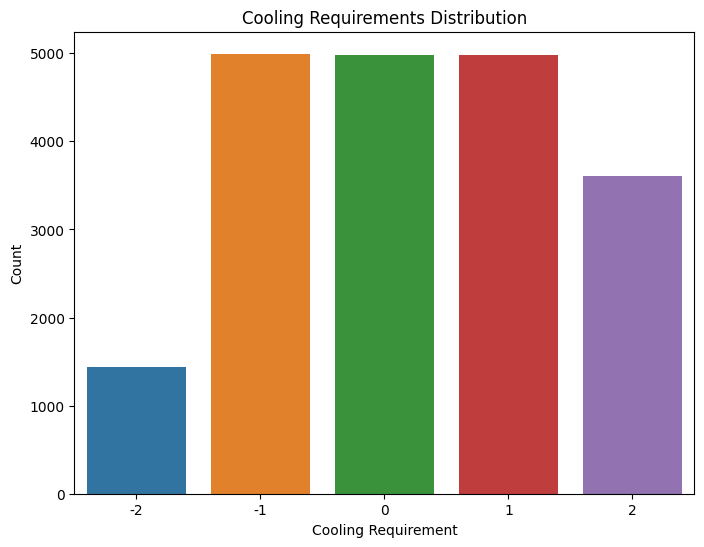

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("q1q1.csv")

# Count the occurrences of each cooling requirement class
cooling_counts = data["Cooling Requirement"].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=cooling_counts.index, y=cooling_counts.values)
plt.xlabel("Cooling Requirement")
plt.ylabel("Count")
plt.title("Cooling Requirements Distribution")
plt.show()


In [ ]:
import csv
import random
import time

# Define the constants and ranges
time_stamps = 5000
time_interval = 30
regions_of_influence = ['A', 'B', 'C', 'D']
humidity_mean = 50
power_mean = 12.50
outside_temp_mean = 25
outside_humidity_mean = 50
outlet_temp_mean = 26

inlet_temp_range = (15, 18)
outlet_temp_range = (19, 33)
humidity_range = (40, 60)
power_range = (5, 20)
outside_temp_range = (15, 35)
outside_humidity_range = (20, 80)

data = []
prev_outside_temp = random.uniform(*outside_temp_range)
prev_outside_humidity = random.uniform(*outside_humidity_range)

timestamp = int(time.time())  # Get the current timestamp in seconds

for ts in range(time_stamps):
    timestamp += time_interval

    outside_temp = random.uniform(prev_outside_temp - 0.2, prev_outside_temp + 0.2)
    outside_humidity = random.uniform(prev_outside_humidity - 1, prev_outside_humidity + 1)

    for roi in ['A','B','C','D']:
        inlet_temp = random.uniform(*inlet_temp_range)

        if roi == 'A':
            correlation_coefficient = random.uniform(0.75, 1)
            outlet_temp = random.uniform(outlet_temp_range[0] + 7, outlet_temp_range[1])
            power = (outlet_temp - outlet_temp_mean) * correlation_coefficient + power_mean
        elif roi == 'B' or roi == 'C':
            correlation_coefficient = random.uniform(0.75, 1)
            outlet_temp = random.uniform(outlet_temp_range[0], outlet_temp_range[0] + 6)
            power = (outlet_temp - outlet_temp_mean) * correlation_coefficient + power_mean - 2
        else:  # ROI is 'D'
            correlation_coefficient = random.uniform(0.75, 1)
            outlet_temp = random.uniform(outlet_temp_range[0]+3, outlet_temp_range[1] - 5)
            power = (outlet_temp - outlet_temp_mean) * correlation_coefficient + power_mean


        humidity = random.uniform(*humidity_range)

        k = (0.6 * (outlet_temp - outlet_temp_mean) / 14) + (0.5 * (power - power_mean) / 15) + \
            (0.1 * (outside_temp - outside_temp_mean) / 20) - (0.1 * (humidity - humidity_mean) / 20) - \
            (0.05 * (outside_humidity - outside_humidity_mean) /60)

        # Add outliers for power consumption and outlet temperature
        if random.random() < 0.05:
            power += random.uniform(2, 4)
        if random.random() < 0.05:
            outlet_temp += random.uniform(2, 4)

        if outlet_temp >= 22 and outlet_temp <= 24:
            cooling_requirement = 0
        if -0.2842<= k <-0.1021:
            cooling_requirement = 0
        elif -0.5109<= k < -0.2842:
            cooling_requirement = -1
        elif k < -0.5109:
            cooling_requirement = -2
        elif -0.1021 <= k < 0.2194:
            cooling_requirement = 1
        else:
            cooling_requirement = 2

        timestamp_string = time.strftime("%H:%M:%S", time.localtime(timestamp))  # Convert timestamp to formatted string

        data.append([inlet_temp, outlet_temp, humidity, power, outside_temp, outside_humidity,k,
                     cooling_requirement])

# Save the data to a CSV file
with open("cooling_dataset.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Inlet Temperature", "Outlet Temperature", "Humidity",
                     "Power Consumption in 100KWh", "Outside Temperature", "Outside Humidity","k",
                     "Cooling Requirement"])
    writer.writerows(data)

from google.colab import files

files.download('cooling_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>